Grandient Descent Step by Step


In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataset = pd.read_csv("diamonds.csv")

In [7]:
dataset['volume']= dataset['x']*dataset['y']*dataset['z']
X =dataset['volume']
Y=dataset['price']

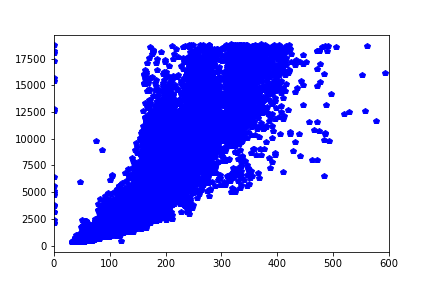

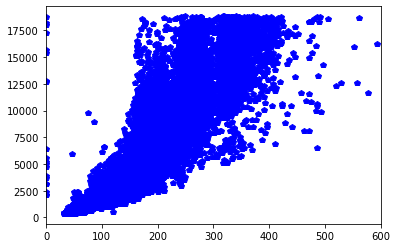

In [33]:
from PIL import Image 
import io

plt.xlim(0,600)
plt.plot(X,Y,'bp')
buf = io.BytesIO()
plt.savefig(buf,format = "png")
buf.seek(0)
im = Image.open(buf)
im #We saved the image inside a variable for reuse purpose. 


In [135]:
Xb=sm.add_constant(X)
regression = sm.OLS(Y,Xb)
model = regression.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 2.365e+05
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:55:29   Log-Likelihood:            -4.7837e+05
No. Observations:               53940   AIC:                         9.567e+05
Df Residuals:                   53938   BIC:                         9.568e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2041.4788     14.342   -142.340      0.000   -2069.590   -2013.368
volume        46.0093      0.095    486.329      0.000      45.824      46.195
==============================================================================
Omnibus:                   106601.519   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4992582236.742
Skew:                         -14.749   Prob(JB):                         0.00
Kurtosis:                    1493.142   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
#Now let us plot the fitted line
fitted_values = model.predict(Xb)

In [139]:
fitted_values

0        -283.830617
1        -453.888949
2        -289.588450
3         108.285835
4         347.196881
            ...     
53935    3291.917800
53936    3392.686192
53937    3224.271633
53938    4435.070076
53939    3689.826546
Length: 53940, dtype: float64

132406.05338865094 3840.5980600000003


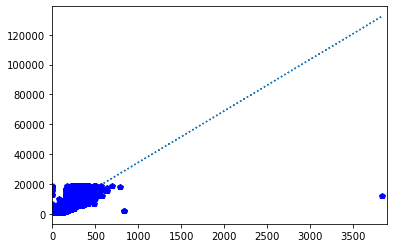

In [49]:

plt.xlim(0,3900)
print(fitted_values.max(),X.max())
plt.plot(X,fitted_values, linestyle = "dotted")
plt.plot(X,Y,'bp')

In [181]:
import sympy as sym# We will use sympy library for creating the gradient decent model since we need differential calculus. 
def Gradient_decent (X,Y,learning_rate =0.00001):
x,y,m,b =sym.symbols("x y m b")
exp = (y-m*x-b)**2
diff_exp = sym.diff(exp,b) #Calculate the differential for first oreder 
print(diff_exp)
sl = sym.lambdify([b,m,x,y],diff_exp) # Befit the function to take parameters.
l=model.params
m=l[1]
b_new=0
diff =[]
for i in range (1,1000): 
    if b_new is not None:
        slope = np.sum(sl(b_old,m,X,Y))
        b_new = b_old-(slope*learning_rate)
        temp=b_new #store the new variable inside a temporary container
        b_new=b_old #replace the new value with the old
        b_old = temp #replace the old with the temp.
        res=b_new-b_old
        print(b_new)
        if res<=0.00001: #set a break point. 
            break
    
    

2*b + 2*m*x - 2*y
-2041.4787948424687


#As we can see the interception here matches the interception obtained by the OLS method. Hence our gradient descent function works perfectly. 